In [0]:
import pandas as pd
df1 = pd.read_csv('/Volumes/workspace/default/airlines/Flight_delay_cleaned.csv')
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484310 entries, 0 to 484309
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         484310 non-null  int64 
 1   DayOfWeek          484310 non-null  int64 
 2   Date               484310 non-null  object
 3   DepTime            484310 non-null  object
 4   ArrTime            484310 non-null  object
 5   CRSArrTime         484310 non-null  object
 6   UniqueCarrier      484310 non-null  object
 7   Airline            484310 non-null  object
 8   FlightNum          484310 non-null  int64 
 9   TailNum            484310 non-null  object
 10  ActualElapsedTime  484310 non-null  int64 
 11  CRSElapsedTime     484310 non-null  int64 
 12  AirTime            484310 non-null  int64 
 13  ArrDelay           484310 non-null  int64 
 14  DepDelay           484310 non-null  int64 
 15  Origin             484310 non-null  object
 16  Org_Airport        4

In [0]:
df1.shape


(484310, 35)

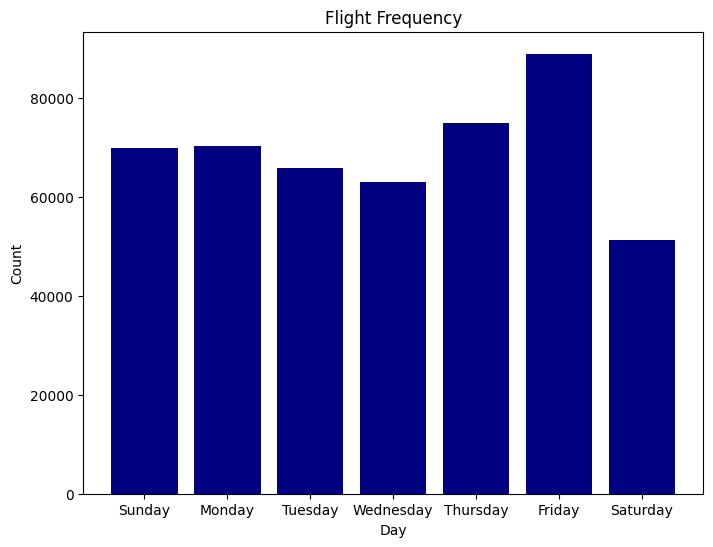

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
day_order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
quality_counts = df1['DayName'].value_counts().reindex(day_order)
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='navy')
plt.title('Flight Frequency')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

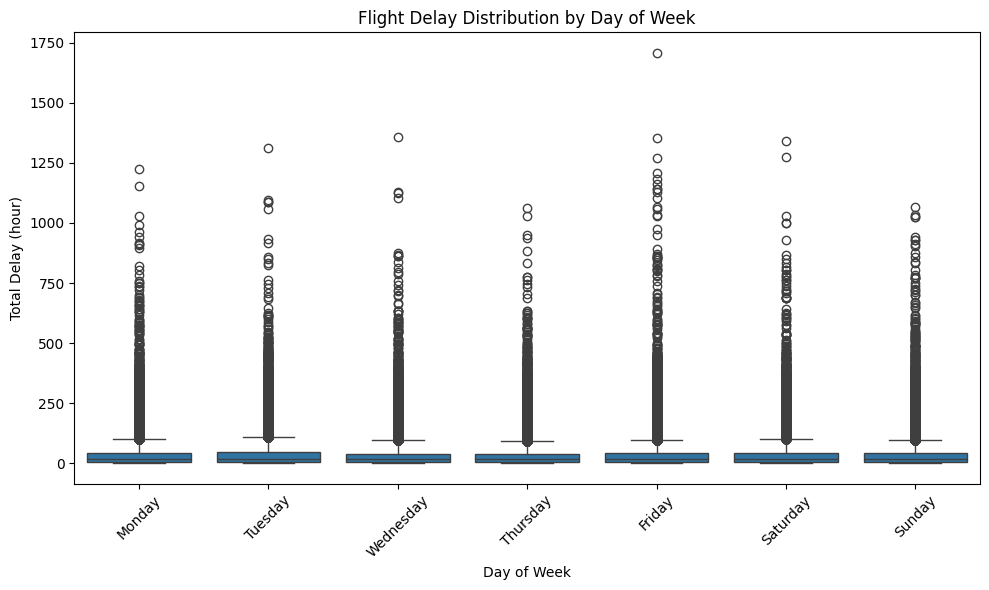

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='DayName', y='TotalDelay', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Flight Delay Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Delay (hour)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

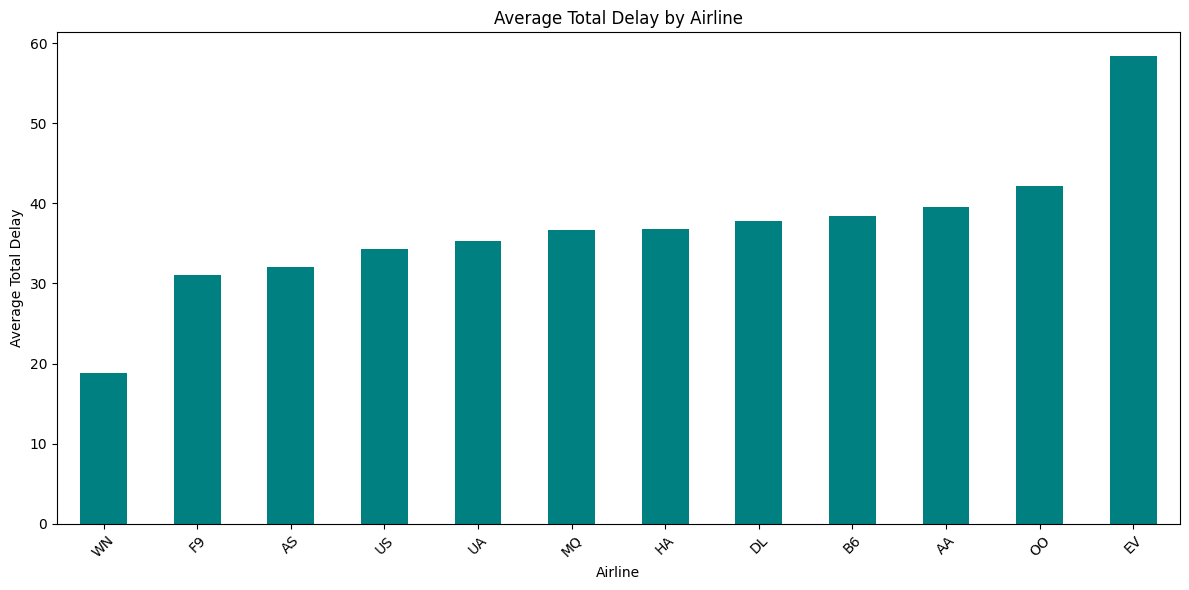

In [0]:
import matplotlib.pyplot as plt

airline_delay = df1.groupby('UniqueCarrier')['TotalDelay'].mean().sort_values()
plt.figure(figsize=(12, 6))
airline_delay.plot(kind='bar', color='teal')
plt.title('Average Total Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Total Delay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

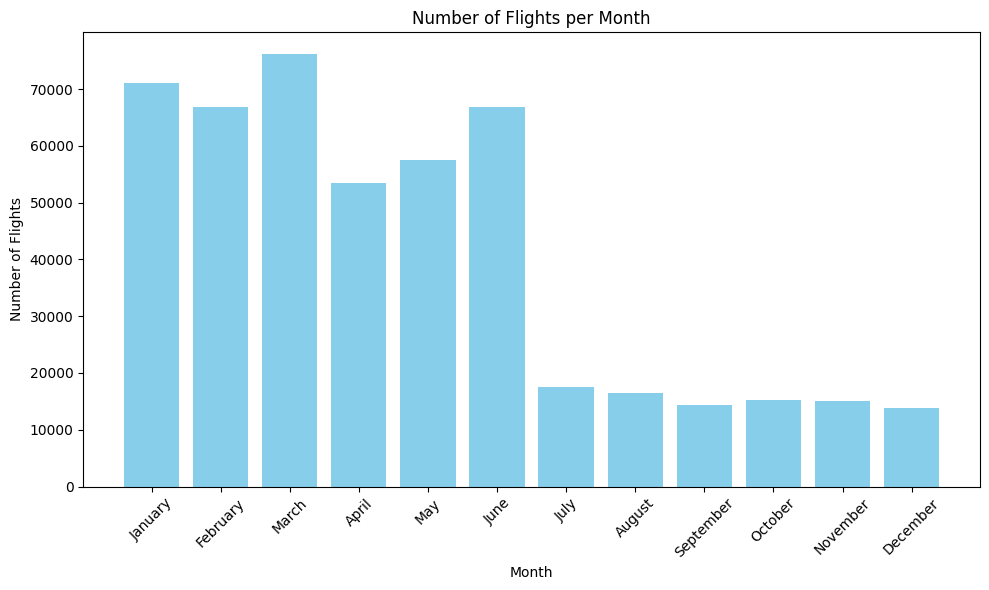

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert numeric month column to full month name
df1['MonthName'] = pd.to_datetime(df1['month'], format='%m').dt.strftime('%B')

# Count flights by month name
flight_counts = df1['MonthName'].value_counts().reindex(month_order, fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(flight_counts.index, flight_counts.values, color='skyblue')
plt.title('Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


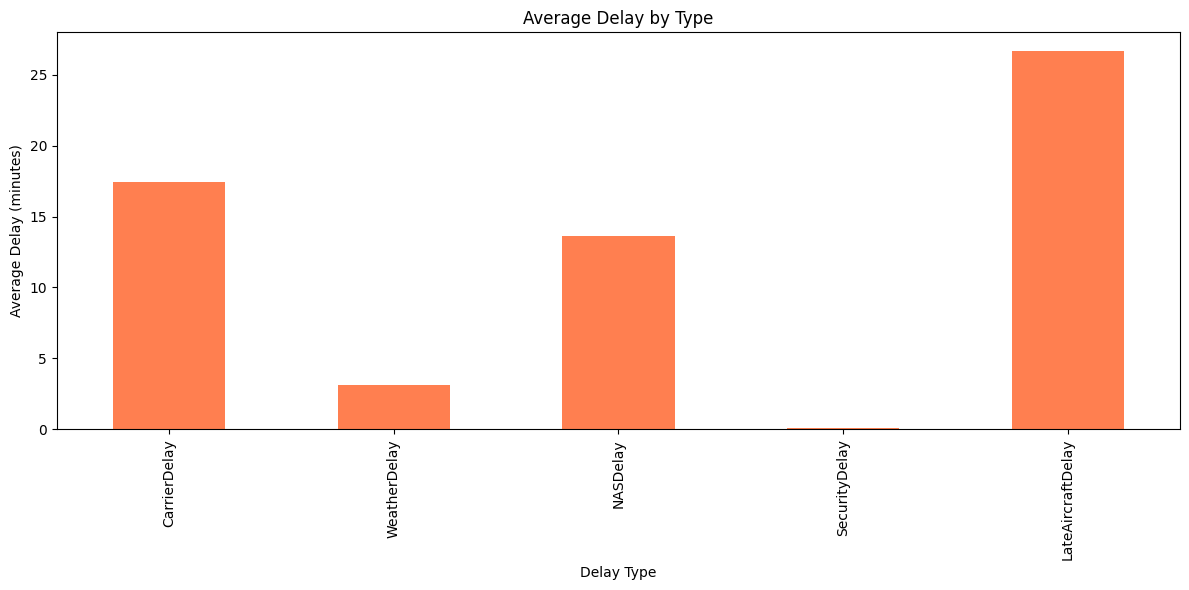

In [0]:
import matplotlib.pyplot as plt

delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
plt.figure(figsize=(12, 6))
df1[delay_types].mean().plot(kind='bar', color='coral')
plt.title('Average Delay by Type')
plt.xlabel('Delay Type')
plt.ylabel('Average Delay (minutes)')
plt.tight_layout()
plt.show()

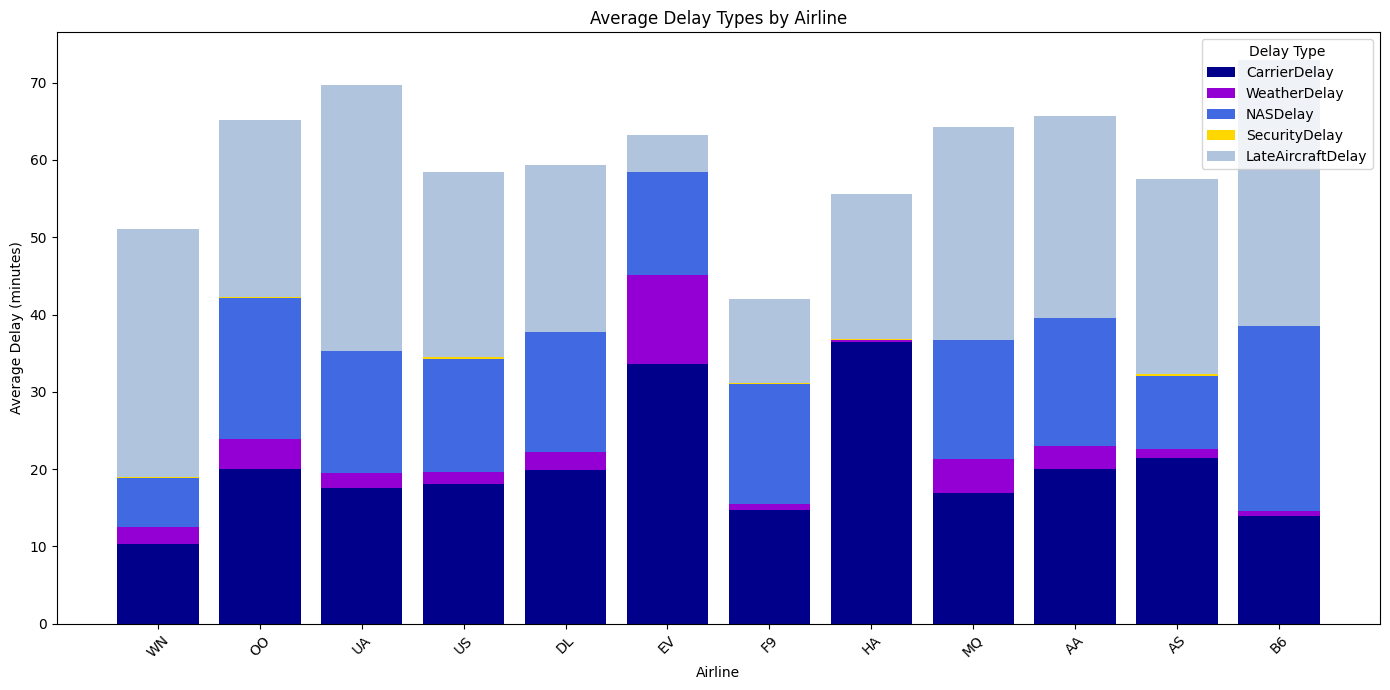

In [0]:
import matplotlib.pyplot as plt

delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
airlines = df1['UniqueCarrier'].unique()
delay_means = df1.groupby('UniqueCarrier')[delay_types].mean().loc[airlines]

colors = ['darkblue', 'darkviolet', 'royalblue', 'gold', 'lightsteelblue']

plt.figure(figsize=(14, 7))
bottom = None
for i, delay in enumerate(delay_types):
    plt.bar(delay_means.index, delay_means[delay], bottom=bottom, color=colors[i], label=delay)
    if bottom is None:
        bottom = delay_means[delay]
    else:
        bottom += delay_means[delay]

plt.title('Average Delay Types by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Delay Type')
plt.tight_layout()
plt.show()

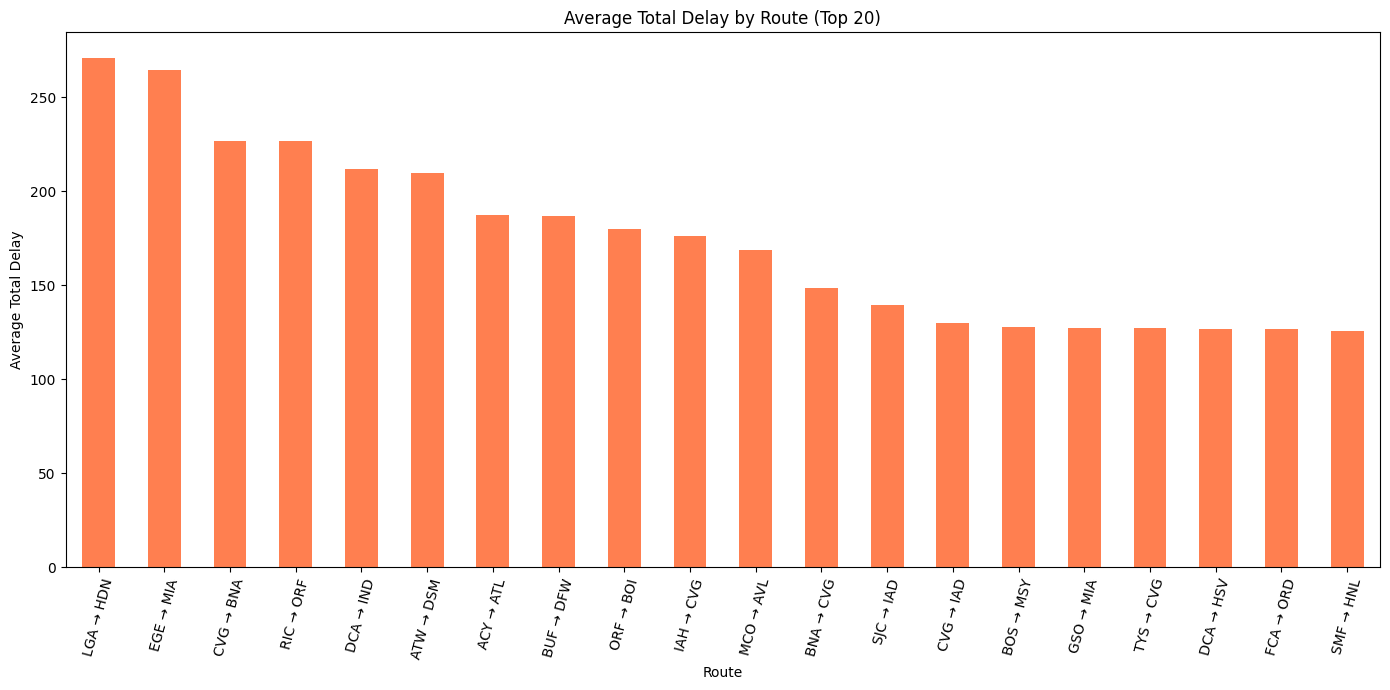

In [0]:
import matplotlib.pyplot as plt

# Create a route column combining origin and destination
df1['Route'] = df1['Origin'] + ' → ' + df1['Dest']

# Calculate average delay per route
route_delay = df1.groupby('Route')['TotalDelay'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 7))
route_delay.plot(kind='bar', color='coral')
plt.title('Average Total Delay by Route (Top 20)')
plt.xlabel('Route')
plt.ylabel('Average Total Delay')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

/home/spark-6dd7b29d-99a3-4d0f-9929-31/.ipykernel/2455/command-7487684508356620-488709580:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


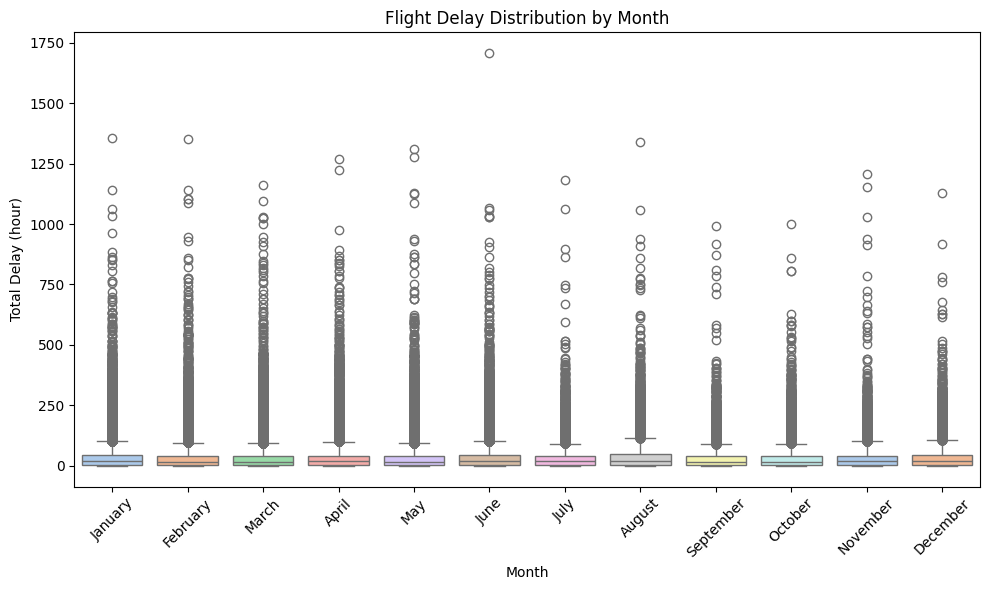

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df1,
    x='MonthName',
    y='TotalDelay',
    order=['January', 'February', 'March', 'April', 'May', 'June',
           'July', 'August', 'September', 'October', 'November', 'December'],
    palette='pastel'
)
plt.title('Flight Delay Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Total Delay (hour)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
top10_security_delay = df1.groupby('Origin')['SecurityDelay'].mean().sort_values(ascending=False).head(10)
display(top10_security_delay)

Origin
BRW    6.126984
YUM    3.303571
SCC    2.425532
OME    1.888889
EKO    1.757143
OTZ    1.529412
IPL    1.342857
BET    1.181818
ASE    1.048673
RDD    0.935000
Name: SecurityDelay, dtype: float64

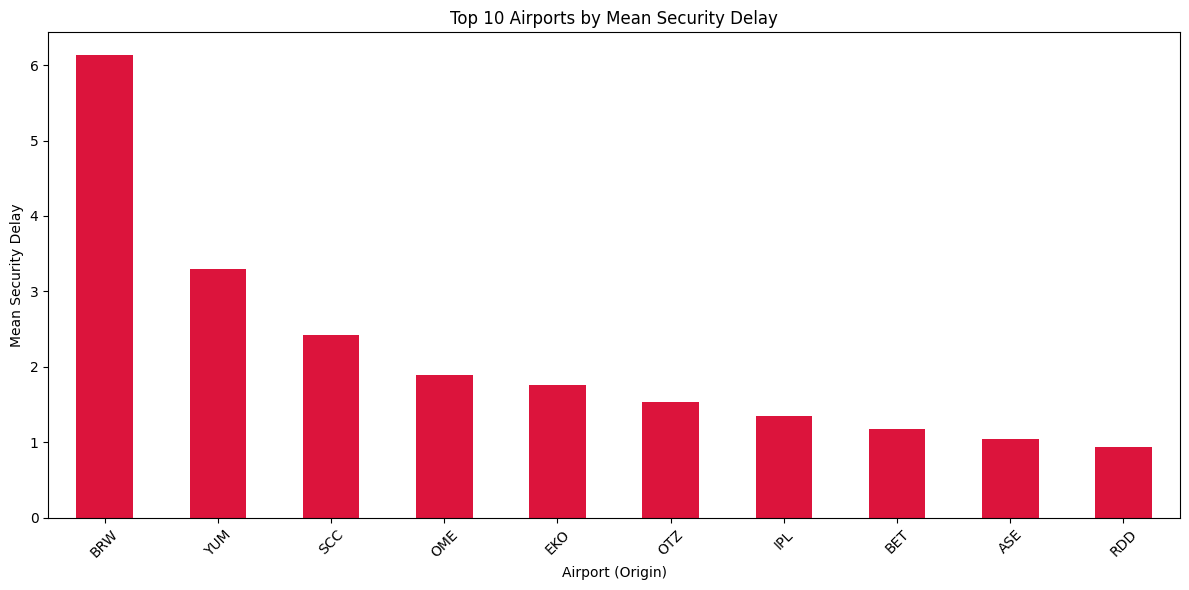

In [0]:
import matplotlib.pyplot as plt

# Calculate mean security delay per airport and get top 10
top10_security_delay = df1.groupby('Origin')['SecurityDelay'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
top10_security_delay.plot(kind='bar', color='grey')
plt.title('Top 10 Airports by Mean Security Delay')
plt.xlabel('Airport (Origin)')
plt.ylabel('Mean Security Delay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/home/spark-6dd7b29d-99a3-4d0f-9929-31/.ipykernel/2455/command-6613288644131784-2240763365:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(airlines, rotation=45, fontsize=8)
/home/spark-6dd7b29d-99a3-4d0f-9929-31/.ipykernel/2455/command-6613288644131784-2240763365:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(airlines, rotation=45, fontsize=8)
/home/spark-6dd7b29d-99a3-4d0f-9929-31/.ipykernel/2455/command-6613288644131784-2240763365:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(airlines, rotation=45, fontsize=8)
/home/spark-6dd7b29d-99a3-4d0f-9929-31/.ipykernel/2455/command-6613288644131784-2240763365:18: UserWarning: set_ticklabels() should only be used with a fixed numbe

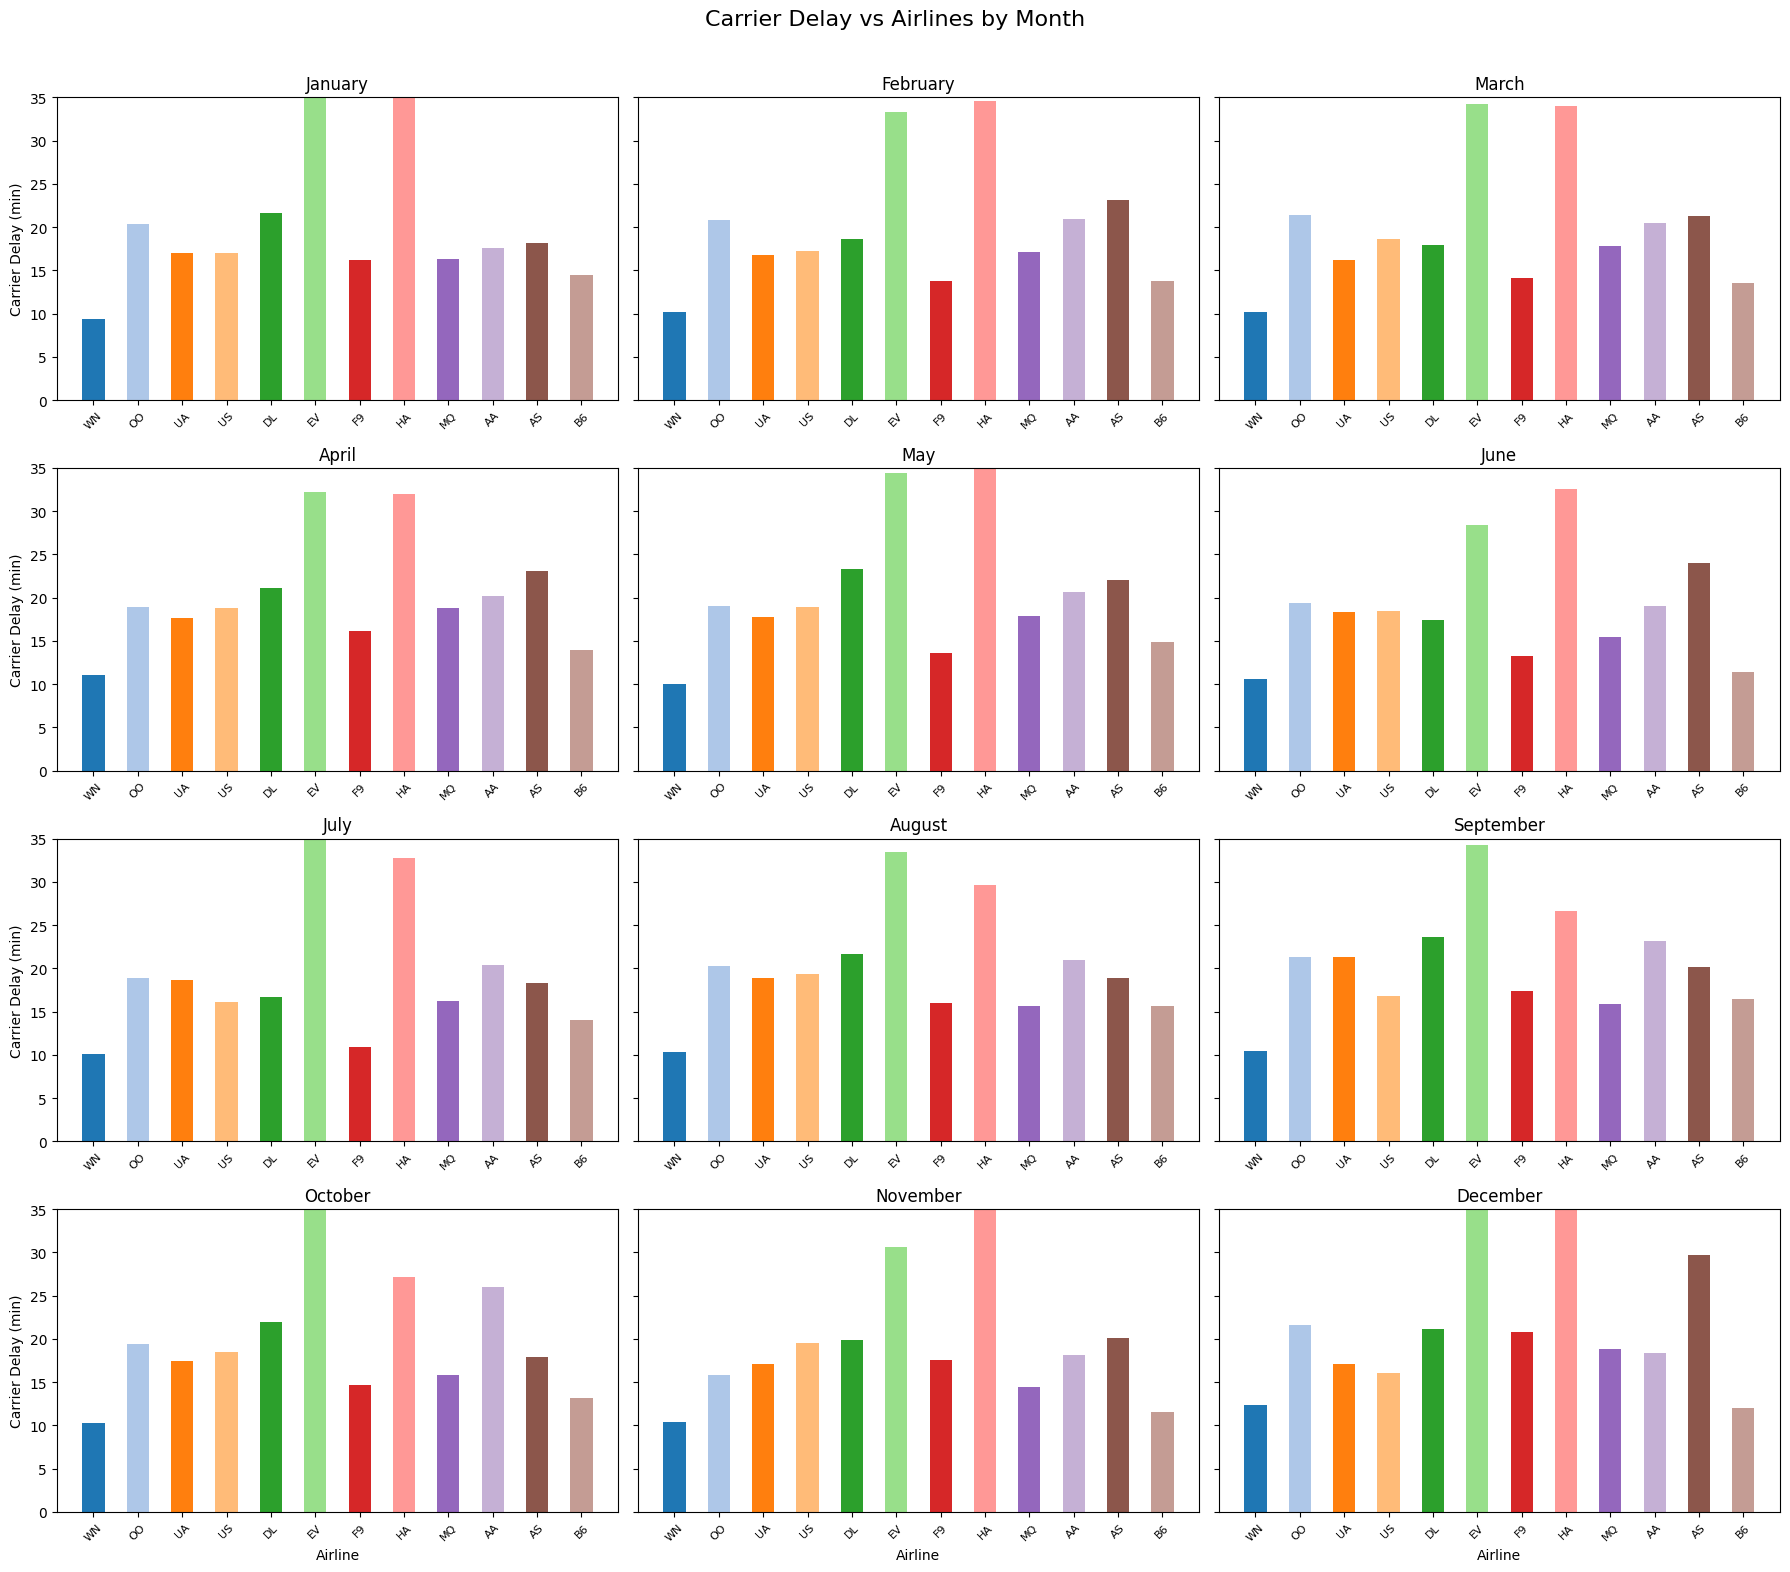

In [0]:
import matplotlib.pyplot as plt

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
airlines = df1['UniqueCarrier'].unique()
colors = plt.cm.tab20.colors[:len(airlines)]

fig, axes = plt.subplots(4, 3, figsize=(18, 16), sharey=True)
axes = axes.flatten()

for i, month in enumerate(month_order):
    ax = axes[i]
    month_data = df1[df1['MonthName'] == month]
    carrier_delay = month_data.groupby('UniqueCarrier')['CarrierDelay'].mean().reindex(airlines)
    ax.bar(airlines, carrier_delay, color=colors, width=0.5)
    ax.set_title(month)
    ax.set_ylim(0, 35)
    ax.set_xticklabels(airlines, rotation=45, fontsize=8)
    ax.set_ylabel('Carrier Delay (min)' if i % 3 == 0 else "")
    ax.set_xlabel('Airline' if i >= 9 else "")

fig.suptitle('Carrier Delay vs Airlines by Month', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

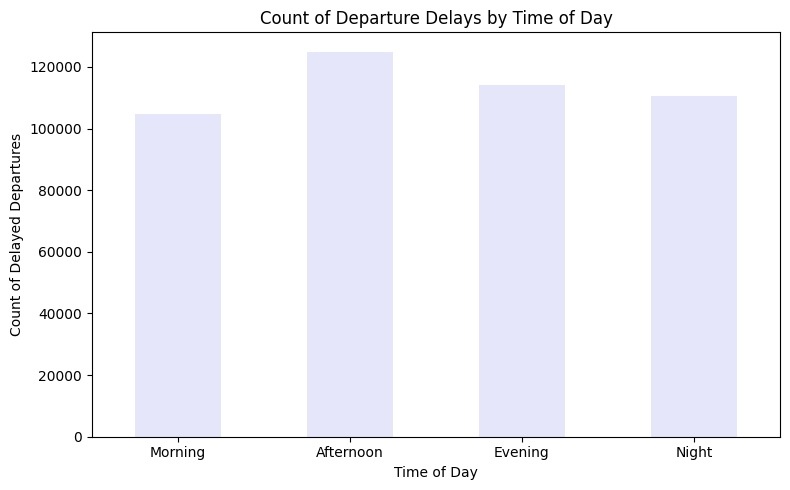

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure depTime is zero-padded and extract hour
df1['DepHour'] = df1['DepTime'].astype(str).str.zfill(4).str[:2].astype(int)

# Categorize depTime into time of day
def time_of_day(hour):
    if 0 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 15:
        return 'Afternoon'
    elif 16 <= hour <= 18:
        return 'Evening'
    elif 19 <= hour <= 21:
        return 'Night'
    else:
        return 'Late Night'

df1['TimeOfDay'] = df1['DepHour'].apply(time_of_day)

# Count of delayed departures by time of day (DepDelay > 0)
delay_counts = df1[df1['DepDelay'] > 0].groupby('TimeOfDay').size().reindex(['Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'], fill_value=0)

# Visualize
plt.figure(figsize=(8, 5))
delay_counts.loc[['Morning', 'Afternoon', 'Evening', 'Night']].plot(kind='bar', color='lavender')
plt.title('Count of Departure Delays by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count of Delayed Departures')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()